In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib
from sklearn.metrics import f1_score

In [5]:
#Import the trained model
#Random Forest
model_names_rf = ["rfc_ros", "rfc_smo", "rfc_bdlsmo", "rfc_rus", "rfc_nm", "rfc_oss", "rfc_smotetomek"]
loaded_models = {}

for model_name in model_names_rf:
    model_filename = f"{model_name}.pkl"
    with open(model_filename, 'rb') as model_file:
        loaded_models[model_name] = joblib.load(model_file)

In [3]:
model_names_lr = ["lr_ros", "lr_smo", "lr_bdlsmo", "lr_rus", "lr_nm", "lr_oss", "lr_smotetomek"]
loaded_models = {}

for model_name in model_names_lr:
    model_filename = f"{model_name}.pkl"
    with open(model_filename, 'rb') as model_file:
        loaded_models[model_name] = joblib.load(model_file)

In [4]:
model_names_nb = ["nb_ros", "nb_smo", "nb_bdlsmo", "nb_rus", "nb_nm", "nb_oss", "nb_smotetomek"]
loaded_models = {}

for model_name in model_names_nb:
    model_filename = f"{model_name}.pkl"
    with open(model_filename, 'rb') as model_file:
        loaded_models[model_name] = joblib.load(model_file)

In [13]:
model_names_xgb = ["xgb_ros", "xgb_smo", "xgb_bdlsmo", "xgb_rus", "xgb_nm", "xgb_oss", "xgb_smotetomek"]
loaded_models = {}

for model_name in model_names_xgb:
    model_filename = f"{model_name}.pkl"
    with open(model_filename, 'rb') as model_file:
        loaded_models[model_name] = joblib.load(model_file)

In [7]:
combined_dataset_1920 = pd.read_csv('dataset_of_1920_combination.csv', sep=',')
combined_dataset_1920

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_5635/518740692.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_dataset_1920 = pd.read_csv('dataset_of_1920_combination.csv', sep=',')


,Rndrng_Prvdr_State_FIPS,Tot_HCPCS_Cds,Tot_Benes_x,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre,Exclusion,Rndrng_Prvdr_Gndr_F,Rndrng_Prvdr_Gndr_M,...,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt,Rndrng_Prvdr_Type_Adult Congenital Heart Disease,Rndrng_Prvdr_Type_Micrographic Dermatologic Surgery,Rndrng_Prvdr_Type_Opioid Treatment Program
0,12.0,46,374,1319.0,349343.44,86736.63,1.3234,0,0,1,...,26,34,34.0,114,1206,29842.66,5031.72,0.0,0.0,0.0
1,42.0,33,347,1485.0,234676.00,112451.04,1.1311,0,1,0,...,24,50,26.0,104,2675,31837.89,9933.55,0.0,0.0,0.0
2,40.0,117,796,3948.0,951912.50,242309.70,1.7276,0,0,1,...,4,7,27.0,14,2996,18329.76,5069.78,0.0,0.0,0.0
3,21.0,34,316,1084.0,153117.00,57786.41,1.2579,0,1,0,...,39,52,49.0,258,6973,57056.42,15717.85,0.0,0.0,0.0
4,6.0,50,1106,16709.0,1591367.95,499766.65,1.8536,0,0,1,...,5,9,56.0,63,82,132101.35,58877.43,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677551,48,37,365,2272.0,587582.00,157754.65,1.6362,0,1,0,...,35,67,46.0,180,4981,107216.47,28209.50,0.0,0.0,0.0
677552,12,50,138,769.0,109972.88,40893.46,0.9913,0,0,1,...,12,17,11.0,35,384,11429.84,2628.15,0.0,0.0,0.0
677553,12,34,1215,6097.0,696266.98,390895.36,1.2452,0,0,1,...,47,56,86.0,502,11743,173452.58,34539.16,0.0,0.0,0.0
677554,6,40,333,1093.0,182515.00,68252.03,1.2418,0,1,0,...,11,27,14.0,55,322,19471.42,4794.00,0.0,0.0,0.0


In [10]:
dataset_2021 = pd.read_csv('combined_dataset_2021.csv', sep=',')
column_ordered_list = [column for column in combined_dataset_1920]
dataset_2021 = dataset_2021.loc[:, column_ordered_list]
dataset_2021

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_5635/1259693481.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_2021 = pd.read_csv('combined_dataset_2021.csv', sep=',')


,Rndrng_Prvdr_State_FIPS,Tot_HCPCS_Cds,Tot_Benes_x,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre,Exclusion,Rndrng_Prvdr_Gndr_F,Rndrng_Prvdr_Gndr_M,...,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt,Rndrng_Prvdr_Type_Adult Congenital Heart Disease,Rndrng_Prvdr_Type_Micrographic Dermatologic Surgery,Rndrng_Prvdr_Type_Opioid Treatment Program
0,08,29,112,162.0,180891.00,28071.92,1.8233,0,0,1,...,4,3,25.0,11,24,4863.99,1082.62,0,0,0
1,42,31,404,1487.0,257901.00,140941.85,1.1156,0,1,0,...,14,35,18.0,66,654,19129.66,5619.54,0,0,0
2,40,117,852,3262.0,1033734.50,277087.11,1.5271,0,0,1,...,4,11,25.0,14,2274,13075.14,5449.53,0,0,0
3,21,29,276,804.0,132437.00,59231.15,1.1414,0,1,0,...,27,45,31.0,162,5306,45503.03,12046.81,0,0,0
4,45,68,996,3514.0,507287.96,163207.62,1.5866,0,0,1,...,3,3,25.0,16,27,19114.07,6886.60,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333717,48,30,329,2055.0,541187.00,160164.01,1.5741,0,1,0,...,36,74,46.0,206,5942,157075.33,48162.30,0,0,0
333718,12,47,144,655.0,117416.12,48420.88,0.9627,0,0,1,...,15,32,13.0,33,530,19228.91,4791.03,0,0,0
333719,12,35,1251,6269.0,682525.19,461163.49,1.1726,0,0,1,...,51,76,86.0,486,24758,202532.22,54549.76,0,0,0
333720,6,31,301,1099.0,166460.10,71607.11,1.0926,0,1,0,...,23,61,25.0,104,1390,65535.62,24883.53,0,0,0


In [19]:
y_test = dataset_2021['Exclusion'].astype('int')
x_test = dataset_2021.drop(labels = 'Exclusion',axis = 1)
# Check for NaN values in x_test
x_test = x_test.apply(pd.to_numeric, errors='coerce')
# Check for NaN values in y_test
y_test = y_test.apply(pd.to_numeric, errors='coerce')

x_test = x_test.loc[y_test.index]
x_test = x_test.dropna()  # Remove rows with NaN values
x_test = x_test.replace([np.inf, -np.inf], np.nan).dropna()  # Remove rows with infinity values

y_test = y_test.dropna()  # Remove rows with NaN values
y_test = y_test.loc[x_test.index]  # Ensure y_test matches the filtered x_test

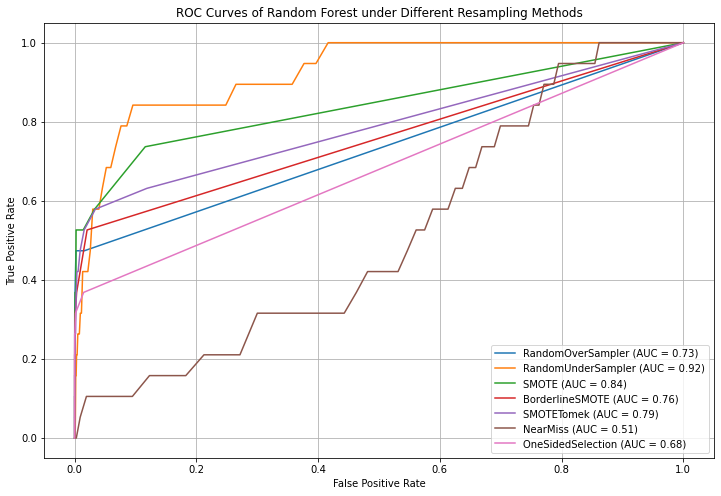

In [28]:
# Load the models
rfc_ros = joblib.load("rfc_ros.pkl")
rfc_smo = joblib.load("rfc_smo.pkl")
rfc_bdlsmo = joblib.load("rfc_bdlsmo.pkl")
rfc_rus = joblib.load("rfc_rus.pkl")
rfc_nm = joblib.load("rfc_nm.pkl")
rfc_oss = joblib.load("rfc_oss.pkl")
rfc_smotetomek = joblib.load("rfc_smotetomek.pkl")

# Create a single plot for ROC curves
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# List of resampling methods
resampling_methods = {
    'RandomOverSampler': rfc_ros,
    'RandomUnderSampler': rfc_rus,
    'SMOTE': rfc_smo,
    'BorderlineSMOTE': rfc_bdlsmo,
    'SMOTETomek': rfc_smotetomek,
    'NearMiss': rfc_nm,
    'OneSidedSelection': rfc_oss
}

# Plot ROC curves for each resampling method
for method, model in resampling_methods.items():
    y_pred = model.predict_proba(x_test)[:, 1]  # Get predicted probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

# Customize the plot as needed
plt.title('ROC Curves of Random Forest under Different Resampling Methods')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')  # Add a legend
plt.grid(True)  # Add grid lines

# Show the plot
plt.show()




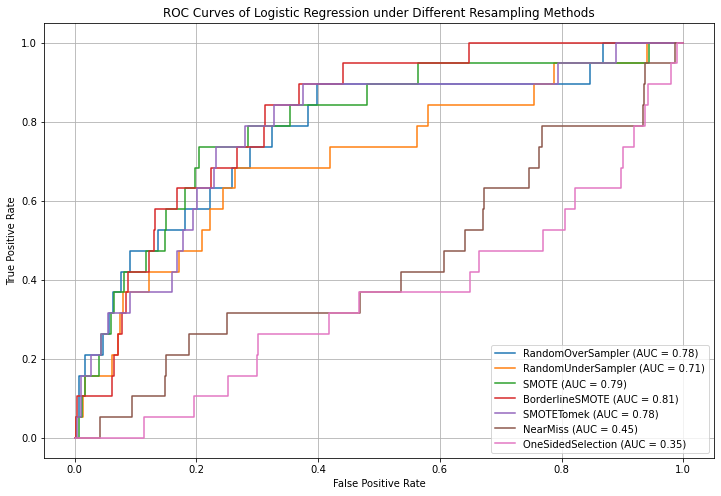

In [29]:
# Load the models
lr_ros = joblib.load("lr_ros.pkl")
lr_smo = joblib.load("lr_smo.pkl")
lr_bdlsmo = joblib.load("lr_bdlsmo.pkl")
lr_rus = joblib.load("lr_rus.pkl")
lr_nm = joblib.load("lr_nm.pkl")
lr_oss = joblib.load("lr_oss.pkl")
lr_smotetomek = joblib.load("lr_smotetomek.pkl")

# Create a single plot for ROC curves
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# List of resampling methods
resampling_methods = {
    'RandomOverSampler': lr_ros,
    'RandomUnderSampler': lr_rus,
    'SMOTE': lr_smo,
    'BorderlineSMOTE': lr_bdlsmo,
    'SMOTETomek': lr_smotetomek,
    'NearMiss': lr_nm,
    'OneSidedSelection': lr_oss
}

# Plot ROC curves for each resampling method
for method, model in resampling_methods.items():
    y_pred = model.predict_proba(x_test)[:, 1]  # Get predicted probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

# Customize the plot as needed
plt.title('ROC Curves of Logistic Regression under Different Resampling Methods')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')  # Add a legend
plt.grid(True)  # Add grid lines

# Show the plot
plt.show()


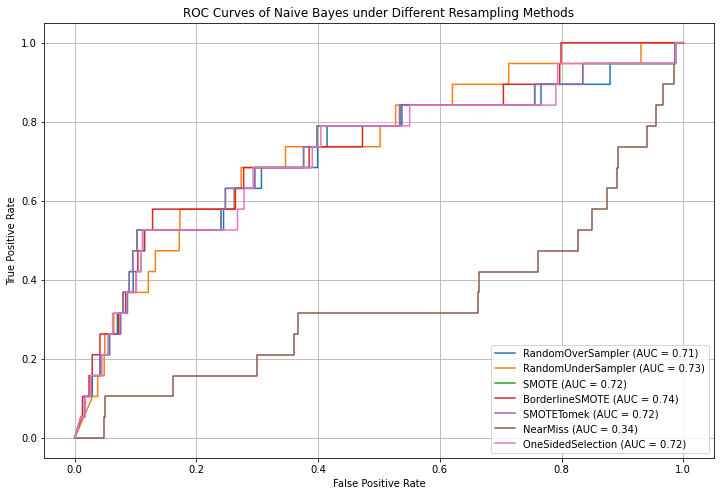

In [30]:
# Load the models
nb_ros = joblib.load("nb_ros.pkl")
nb_smo = joblib.load("nb_smo.pkl")
nb_bdlsmo = joblib.load("nb_bdlsmo.pkl")
nb_rus = joblib.load("nb_rus.pkl")
nb_nm = joblib.load("nb_nm.pkl")
nb_oss = joblib.load("nb_oss.pkl")
nb_smotetomek = joblib.load("nb_smotetomek.pkl")

# Create a single plot for ROC curves
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# List of resampling methods
resampling_methods = {
    'RandomOverSampler': nb_ros,
    'RandomUnderSampler': nb_rus,
    'SMOTE': nb_smo,
    'BorderlineSMOTE': nb_bdlsmo,
    'SMOTETomek': nb_smotetomek,
    'NearMiss': nb_nm,
    'OneSidedSelection': nb_oss
}

# Plot ROC curves for each resampling method
for method, model in resampling_methods.items():
    y_pred = model.predict_proba(x_test)[:, 1]  # Get predicted probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

# Customize the plot as needed
plt.title('ROC Curves of Naive Bayes under Different Resampling Methods')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')  # Add a legend
plt.grid(True)  # Add grid lines

# Show the plot
plt.show()


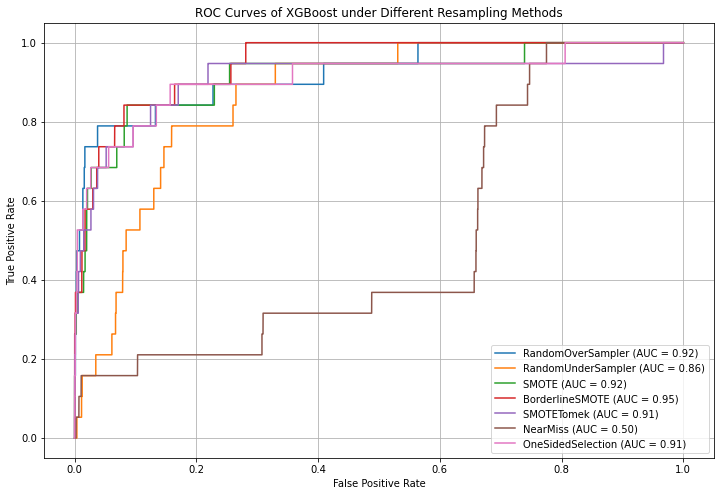

In [31]:
# Load the models
xgb_ros = joblib.load("xgb_ros.pkl")
xgb_smo = joblib.load("xgb_smo.pkl")
xgb_bdlsmo = joblib.load("xgb_bdlsmo.pkl")
xgb_rus = joblib.load("xgb_rus.pkl")
xgb_nm = joblib.load("xgb_nm.pkl")
xgb_oss = joblib.load("xgb_oss.pkl")
xgb_smotetomek = joblib.load("xgb_smotetomek.pkl")

# Create a single plot for ROC curves
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# List of resampling methods
resampling_methods = {
    'RandomOverSampler': xgb_ros,
    'RandomUnderSampler': xgb_rus,
    'SMOTE': xgb_smo,
    'BorderlineSMOTE': xgb_bdlsmo,
    'SMOTETomek': xgb_smotetomek,
    'NearMiss': xgb_nm,
    'OneSidedSelection': xgb_oss
}

# Plot ROC curves for each resampling method
for method, model in resampling_methods.items():
    y_pred = model.predict_proba(x_test)[:, 1]  # Get predicted probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

plt.title('ROC Curves of XGBoost under Different Resampling Methods')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')  # Add a legend
plt.grid(True)  # Add grid lines

# Show the plot
plt.show()

In [34]:


# Create lists to store F1-score values for each resampling method
list_rf = []

# Predicted values for the test set, random forests
rfc_preds = {
    'RandomOverSampler': rfc_ros.predict(x_test),
    'RandomUnderSampler': rfc_rus.predict(x_test),
    'SMOTE': rfc_smo.predict(x_test),
    'BorderlineSMOTE': rfc_bdlsmo.predict(x_test),
    'SMOTETomek': rfc_smotetomek.predict(x_test),
    'NearMiss': rfc_nm.predict(x_test),
    'OneSidedSelection': rfc_oss.predict(x_test)
}

# Calculate and store the F1-score for each resampling method
for method, predictions in rfc_preds.items():
    mcc_rf = f1_score(y_test, predictions, pos_label=0)
    list_rf.append(mcc_rf)

list_rf

[0.9999715293105748,
 0.8102901457414092,
 0.9999730277274962,
 0.9999715293105748,
 0.9999730277274962,
 0.3402863616354,
 0.9999715293105748]

In [36]:
# Create lists to store F1-score values for each resampling method
list_lr = []

# Predicted values for the test set, Logistic Regression
lr_preds = {
    'RandomOverSampler': lr_ros.predict(x_test),
    'RandomUnderSampler': lr_rus.predict(x_test),
    'SMOTE': lr_smo.predict(x_test),
    'BorderlineSMOTE': lr_bdlsmo.predict(x_test),
    'SMOTETomek': lr_smotetomek.predict(x_test),
    'NearMiss': lr_nm.predict(x_test),
    'OneSidedSelection': lr_oss.predict(x_test)
}

# Calculate and store the F1-score for each resampling method
for method, predictions in lr_preds.items():
    mcc_lr = f1_score(y_test, predictions, pos_label=0)
    list_lr.append(mcc_lr)

list_lr

[0.5092182833195202,
 0.6897327608041326,
 0.6999253860734956,
 0.7505350131717154,
 0.5464750815151693,
 0.8408918407719979,
 0.999964036754437]

In [37]:
# Create lists to store F1-score values for each resampling method
list_nb = []

# Predicted values for the test set, Naive Bayes
nb_preds = {
    'RandomOverSampler': nb_ros.predict(x_test),
    'RandomUnderSampler': nb_rus.predict(x_test),
    'SMOTE': nb_smo.predict(x_test),
    'BorderlineSMOTE': nb_bdlsmo.predict(x_test),
    'SMOTETomek': nb_smotetomek.predict(x_test),
    'NearMiss': nb_nm.predict(x_test),
    'OneSidedSelection': nb_oss.predict(x_test)
}

# Calculate and store the F1-score for each resampling method
for method, predictions in nb_preds.items():
    mcc_nb = f1_score(y_test, predictions, pos_label=0)
    list_nb.append(mcc_nb)

list_nb

[0.972941694291316,
 0.9606069148546802,
 0.9632180908082512,
 0.9698024081506638,
 0.9631375497952259,
 0.09970983458578105,
 0.9871482774320838]

In [38]:
# Create lists to store F1-score values for each resampling method
list_xgb = []

# Predicted values for the test set, XGBoost
xgb_preds = {
    'RandomOverSampler': xgb_ros.predict(x_test),
    'RandomUnderSampler': xgb_rus.predict(x_test),
    'SMOTE': xgb_smo.predict(x_test),
    'BorderlineSMOTE': xgb_bdlsmo.predict(x_test),
    'SMOTETomek': xgb_smotetomek.predict(x_test),
    'NearMiss': xgb_nm.predict(x_test),
    'OneSidedSelection': xgb_oss.predict(x_test)
}

# Calculate and store the F1-score for each resampling method
for method, predictions in xgb_preds.items():
    mcc_xgb = f1_score(y_test, predictions, pos_label=0)
    list_xgb.append(mcc_xgb)

list_xgb

[0.9999115849226818,
 0.8099506923577613,
 0.9966894984033821,
 0.9999595408031,
 0.9969096741028886,
 0.36444960761535033,
 0.9999730277274962]